In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd


In [6]:
data = pd.read_csv('../all_haiku.csv')


data['haiku'] = data['0']+' '+data['1']+' '+data['2']
data['haiku'] = data['haiku'].apply(lambda x: str(x).strip().replace('-','').lower())


tokenizer = Tokenizer()

corpus = data.iloc[0:200,-1].to_list()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(total_words)
#print(tokenizer.word_index)


766


In [8]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=30, verbose=1)
#print model.summary()
print(model)

Epoch 1/30
46/46 [==============================] - 7s 162ms/step - loss: 6.3108 - accuracy: 0.0866
Epoch 2/30
46/46 [==============================] - 8s 171ms/step - loss: 5.4915 - accuracy: 0.1166
Epoch 3/30
46/46 [==============================] - 9s 200ms/step - loss: 4.9850 - accuracy: 0.1432
Epoch 4/30
46/46 [==============================] - 16s 356ms/step - loss: 4.3942 - accuracy: 0.1903
Epoch 5/30
46/46 [==============================] - 8s 175ms/step - loss: 3.6062 - accuracy: 0.2592
Epoch 6/30
46/46 [==============================] - 11s 244ms/step - loss: 2.7360 - accuracy: 0.3799
Epoch 7/30
46/46 [==============================] - 8s 171ms/step - loss: 1.9181 - accuracy: 0.5593
Epoch 8/30
46/46 [==============================] - 9s 202ms/step - loss: 1.2424 - accuracy: 0.7094
Epoch 9/30
46/46 [==============================] - 8s 173ms/step - loss: 0.8123 - accuracy: 0.8117
Epoch 10/30
46/46 [==============================] - 8s 172ms/step - loss: 0.5242 - accuracy: 0.87

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()


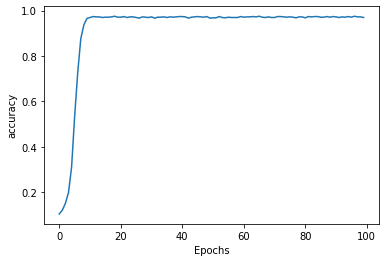

In [17]:
plot_graphs(history, 'accuracy')

In [10]:
seed_text = "fishing boats colors of the rainbow"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


fishing boats colors of the rainbow a white barn with painted butterflies window black umbrellas bloom ticks dark sea pool sea sea room the dark this train in the plastic sea reading light light of my hand sea ticks reading light from the sea and salt of pines so far from the sea this dark the sea this train reading dark the sea this train sea reading light from the clouds ticks ticks the morning sea sky light light reading between light reading sea light dark this morning between ticks sea ticks the clouds this morning sea ticks the sea this plastic bag reading dark dark


array([[    0,     0,     0, ...,     7,     1,  1869],
       [    0,     0,     0, ...,   283,     8,   463],
       [    0,     0,     0, ...,     7,   263,   514],
       ...,
       [    0,     0,     0, ...,    25,  8136,   251],
       [    0,     0,     0, ..., 53253,   116,  2753],
       [    0,     0,     0, ...,   825,   245,   347]], dtype=int32)